In [4]:
# Define a problem statement (outcomes: Regression or Classification)
# The target variable indicates whether a patient has diabetes. The goal of this dataset is to build and evaluate various machine learning or deep learning models to predict the onset of diabetes.
# Outcome: Class variable (0 or 1), where 1 represents the presence of diabetes and 0 represents the absence of diabetes.


df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
# Search for a tabular dataset
#The uploaded dataset diabetes.csv contains medical details of patients, including features such as glucose level, blood pressure, insulin level, BMI, age, and more. Below is a detailed description of each column in the dataset:
# Pregnancies: Number of times the patient has been pregnant.
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
# BloodPressure: Diastolic blood pressure (mm Hg).
# SkinThickness: Triceps skinfold thickness (mm).
# Insulin: 2-Hour serum insulin (mu U/ml).
# BMI: Body mass index (weight in kg/(height in m)^2).
# DiabetesPedigreeFunction: A function that scores likelihood of diabetes based on family history.
# Age: Age of the patient (years).




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Moved outside the loop to be accessible
df = pd.read_csv('/content/diabetes.csv') # Read the file outside the loop so 'df' is available globally
df # Now df is defined in this scope



/content/diabetes.csv
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/configurations/config_default
/content/.config/logs/2024.06.26/17.01.18.948801.log
/content/.config/logs/2024.06.26/17.00.54.947310.log
/content/.config/logs/2024.06.26/17.01.37.882107.log
/content/.config/logs/2024.06.26/17.01.29.848356.log
/content/.config/logs/2024.06.26/17.01.48.941695.log
/content/.config/logs/2024.06.26/17.01.48.287580.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
zeros_count = df[df == 0].count()
zeros_count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


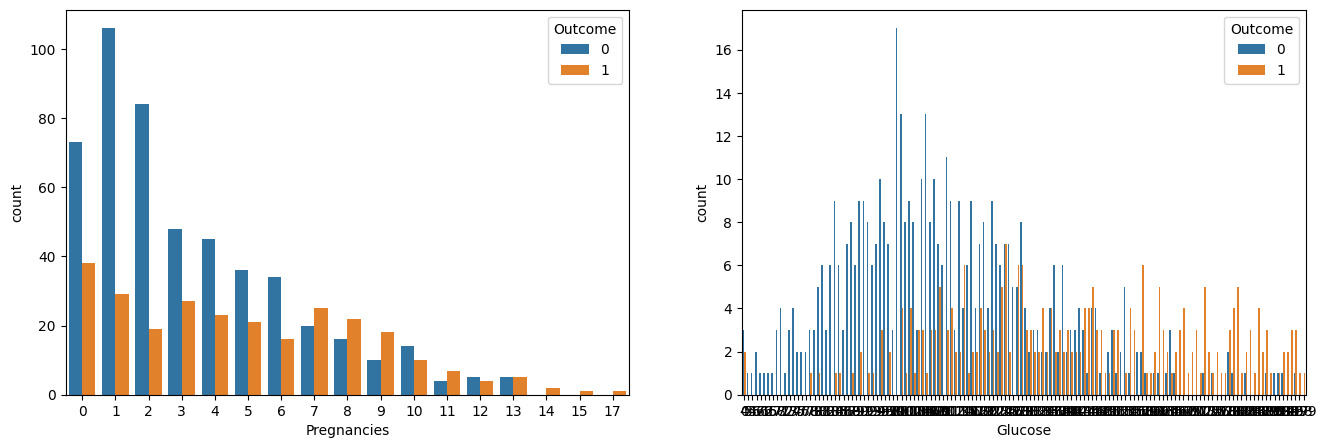

In [9]:
# Data Preprocessing and Cleansing
# all values is numerical, there's not null values
# Check for and handle any missing values.
# Explore the distribution of each feature.
# Normalize or standardize the data if required.
# Perform feature engineering if necessary. This dataset can be used for binary classification tasks to predict whether a patient has diabetes based on the given features.

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data=df, x='Pregnancies', hue='Outcome', ax=ax[0])
sns.countplot(data=df, x='Glucose', hue='Outcome', ax=ax[1])

plt.show()

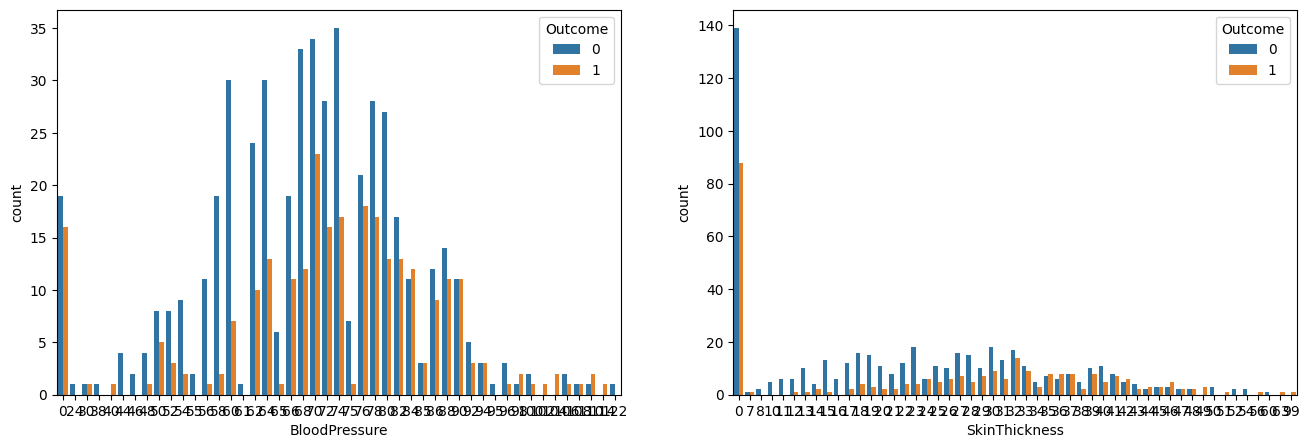

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data=df, x='BloodPressure', hue='Outcome', ax=ax[0])
sns.countplot(data=df, x='SkinThickness', hue='Outcome', ax=ax[1])

plt.show()

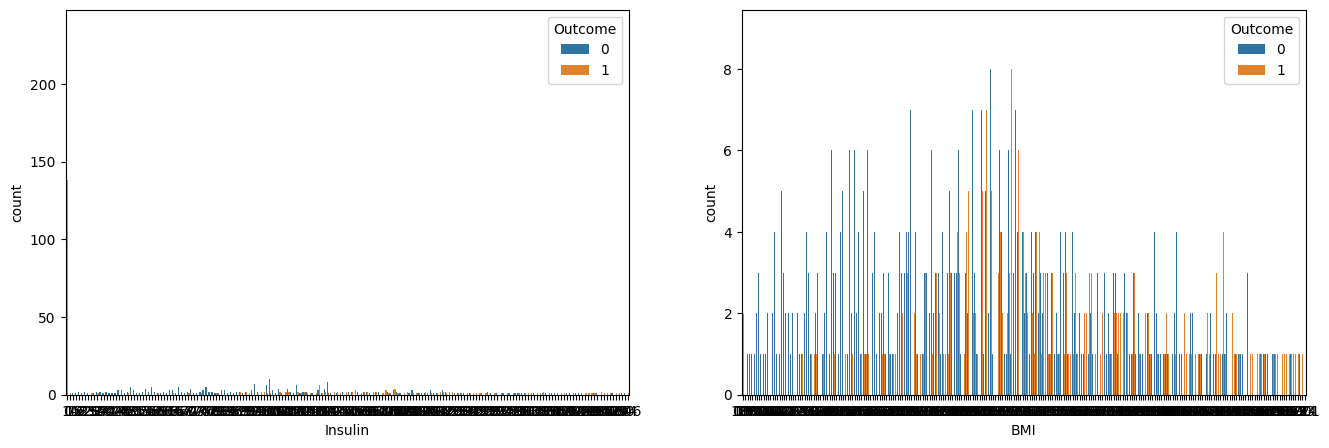

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data=df, x='Insulin', hue='Outcome', ax=ax[0])
sns.countplot(data=df, x='BMI', hue='Outcome', ax=ax[1])

plt.show()

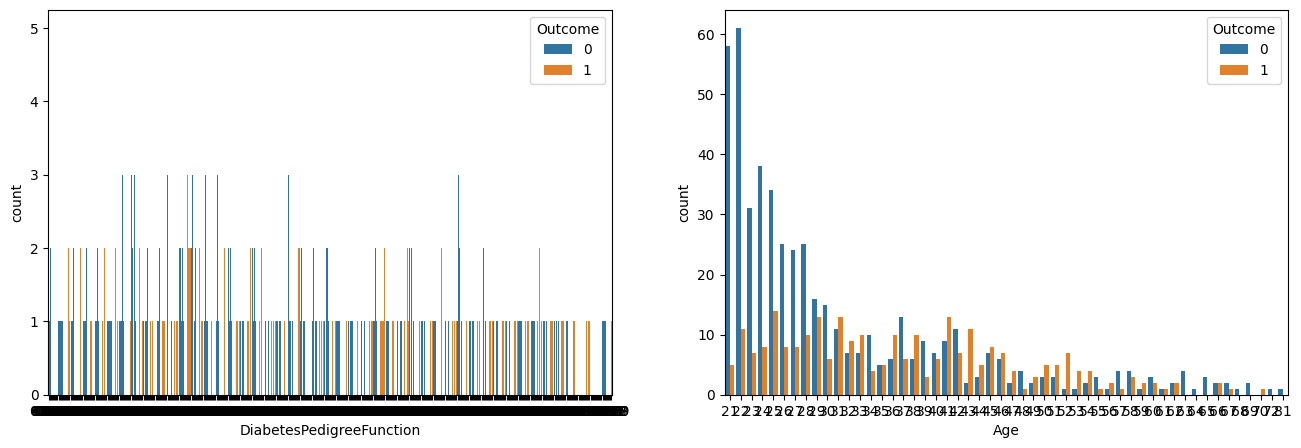

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', ax=ax[0])
sns.countplot(data=df, x='Age', hue='Outcome', ax=ax[1])

plt.show()

# feature and target


In [13]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
y = df.Outcome
x = df[features]

# Metrics selection for evaluation

# Choosing the best model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_train)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

# Metrics selection for evaluation

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is: {accuracy:.2f}')

Accuracy is: 0.72
